## Name: Aaron Tan
## Email: whit3magic101@gmail.com

## Datasets: Abalone
https://www.kaggle.com/rodolfomendes/abalone-dataset

# Problem Formulation
## Predicting the age of abalone by physical measurements

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [ ]:
# Import files from google account
from google.colab import files
files.upload()
# You would need to download some kaggle.json file on the kaggle website

Saving abalone.csv to abalone.csv


{'abalone.csv': b'Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings\nM,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15\nM,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7\nF,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9\nM,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10\nI,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7\nI,0.425,0.3,0.095,0.3515,0.141,0.0775,0.12,8\nF,0.53,0.415,0.15,0.7775,0.237,0.1415,0.33,20\nF,0.545,0.425,0.125,0.768,0.294,0.1495,0.26,16\nM,0.475,0.37,0.125,0.5095,0.2165,0.1125,0.165,9\nF,0.55,0.44,0.15,0.8945,0.3145,0.151,0.32,19\nF,0.525,0.38,0.14,0.6065,0.194,0.1475,0.21,14\nM,0.43,0.35,0.11,0.406,0.1675,0.081,0.135,10\nM,0.49,0.38,0.135,0.5415,0.2175,0.095,0.19,11\nF,0.535,0.405,0.145,0.6845,0.2725,0.171,0.205,10\nF,0.47,0.355,0.1,0.4755,0.1675,0.0805,0.185,10\nM,0.5,0.4,0.13,0.6645,0.258,0.133,0.24,12\nI,0.355,0.28,0.085,0.2905,0.095,0.0395,0.115,7\nF,0.44,0.34,0.1,0.451,0.188,0.087,0.13,10\nM,0.365,0.295,0.08,0.2555,0.097,0.043,0.1,7\nM,0

In [ ]:
df = pd.read_csv("abalone.csv")
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [ ]:
# The age of the abalone is (number of rings + 1.5) years.
# Remove the Rings columns and replace with Age
# By writing (df["Age"] = ...) , it creates a new column Age

df["Age"] = df["Rings"] + 1.5
# df1 = df.drop(columns=["Rings"])
# Alternatively: df1 = df.drop(["Age"], axis=1)
# you dont need to assign a new variable if u use inplace=True

df.drop(["Rings"], axis=1, inplace=True)

In [ ]:
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,9.5
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,21.5
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,17.5
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,10.5
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,20.5


In [ ]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [ ]:
df.info()
# No NaNs values found
# 1 Object found (Sex: M/F/I)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Age               4177 non-null float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [ ]:
unique = []
for f in df["Sex"]:
    if f not in unique:
         unique.append(f)
print(f"Sex columns contains categorical features of {unique}.")

Sex columns contains categorical features of ['M', 'F', 'I'].


In [ ]:
# Counts how many Male, Female and Immature Abalone
df["Sex"].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


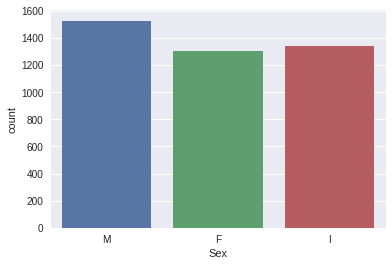

In [ ]:
sns.countplot(x="Sex", data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


KeyboardInterrupt: ignored

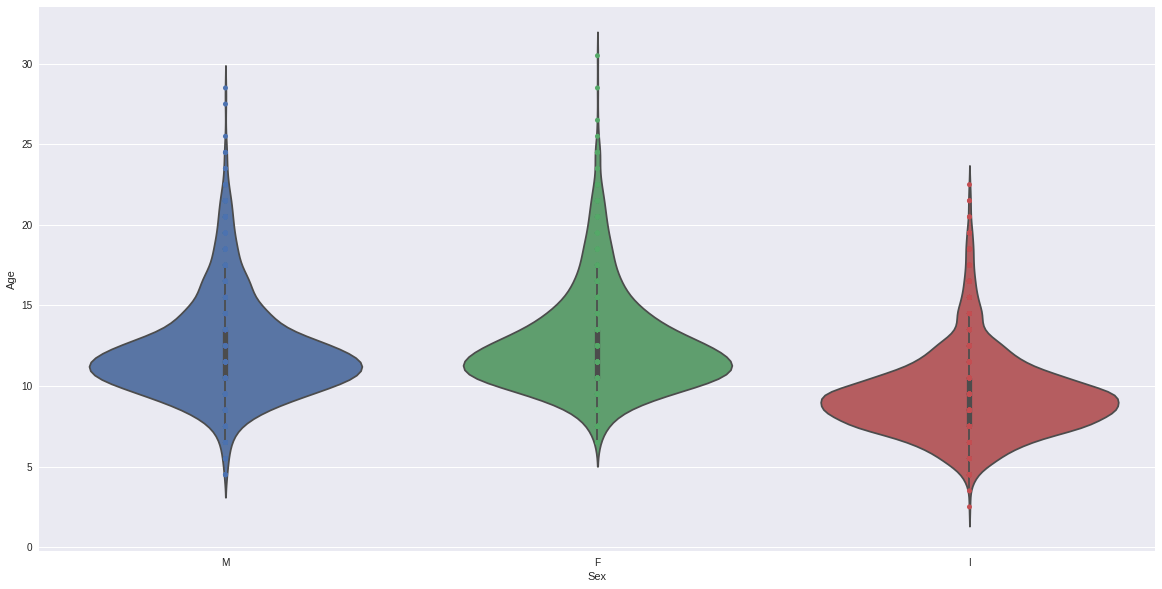

In [ ]:
# FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; 
# use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index,
# `arr[np.array(seq)]`, which will result either in an error or a different result.

plt.figure(figsize =(20,10)) # Change the dimensions of the plot

sns.violinplot(x="Sex", y="Age", data=df)
sns.swarmplot(x="Sex", y="Age", data=df, hue="Sex")

In [ ]:
numerical_features = df.columns[df.columns != "Sex"]
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

In [ ]:
# Label encoding of Sex column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Sex"]  = encoder.fit_transform(df["Sex"])


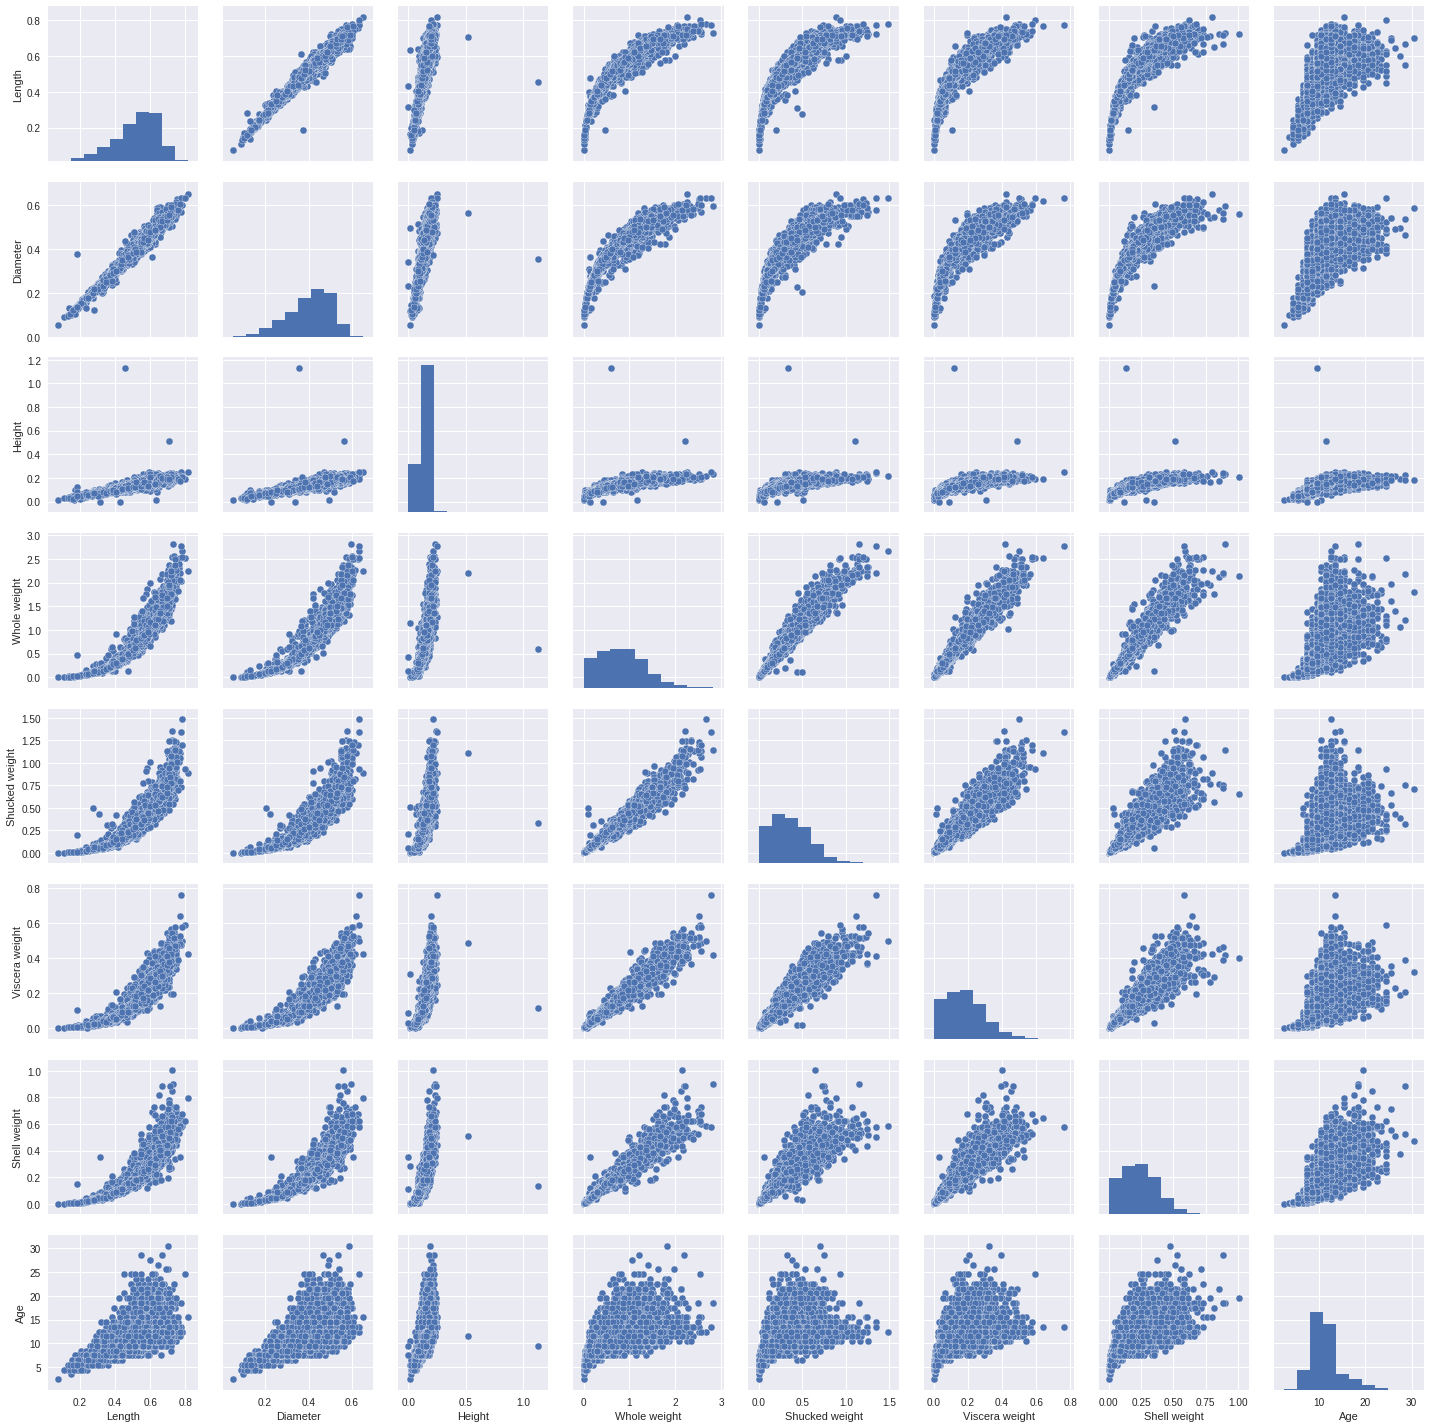

In [ ]:
# Compare every feature by feature
# Length is linearly correlated with diameter 
# Non-linear relation with height, whole weight, shucked weight, viscera weight and shell weight

# looks like height affects the length and diameter of abalone greatly. (small change in H, big change in L and D)
sns.pairplot(df[numerical_features])

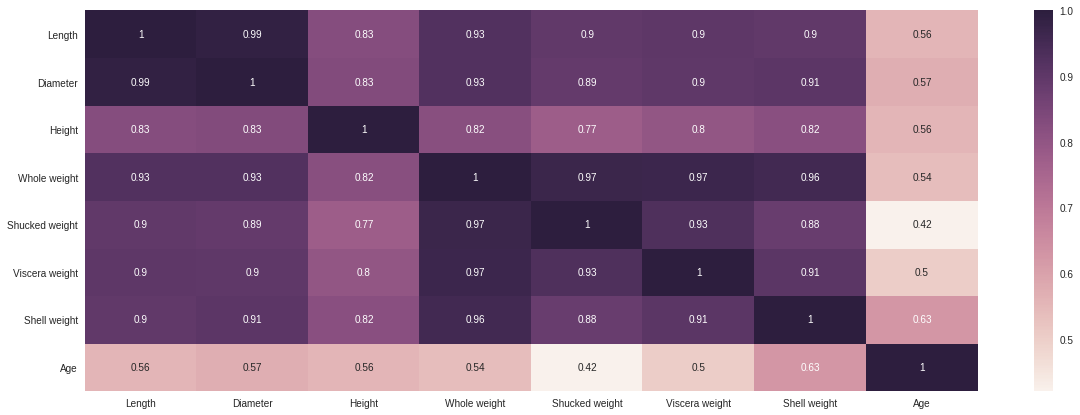

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(df[numerical_features].corr(), annot=True)

In [ ]:
# Data Visualisation

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


In [ ]:
target = ["Age"]
y = df.loc[:, target]
y.head()

,Age
0,16.5
1,8.5
2,10.5
3,11.5
4,8.5


In [ ]:
X =  df.drop(["Age"], axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [ ]:
# Automatically shuffles it.
# test contain 25% of the total data, train contain 75% of the total data
X_train, X_test, y_train, y_test  = train_test_split(X,y)
print(len(X_train)/len(X))
print(len(X_test))
print(len(X))
print(len(y_train))
print(len(y))

0.7498204452956667
1045
4177
3132
4177


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_train_scaled[:5]

array([[-1.27989186,  1.82207534,  1.76442156,  1.16583563,  2.27886241,
         2.13902481,  2.28957257,  2.45098841],
       [ 1.1378532 , -0.26017491, -0.25154529, -0.12486681, -0.262279  ,
        -0.68410324, -0.40841034,  0.14682209],
       [-0.07101933, -1.42623505, -1.41072623, -1.53290582, -1.33675526,
        -1.27327779, -1.36328909, -1.33468207],
       [ 1.1378532 ,  0.86424023,  1.00843399,  2.10452831,  1.41564254,
         0.88926061,  0.88878345,  2.34058786],
       [-0.07101933, -0.75991497, -0.90673451, -1.41556924, -1.02340847,
        -0.96306847, -1.07502381, -0.97142864]])

In [ ]:
X_train_scaled.shape

(3132, 8)

In [ ]:
# PCA is basically squashing a higher dimension data(3D) into a lower dimension data(2D) data so that it can be visualised easier.
# But in the process it wants to capture as much of the spread/variance of the data as possible
# It's kind of a solution to a data reduction problem

# Steps to PCA
# 1 Translate the data so that the centre is at the origin
# 2 Calculate the covariance matrix
# 3 Find the principal components
# 4 Reduce the data using the selected principal components


In [ ]:
pca2 = PCA(n_components=2)
X_train_pca2 = pca2.fit_transform(X_train_scaled)

In [ ]:
# Successfully changed from 8D to 2D.
print('X_train_scaled ', X_train_scaled.shape)
print('X_train_pca2', X_train_pca2.shape)

X_train_scaled  (3132, 8)
X_train_pca2 (3132, 2)


In [ ]:
pca2.explained_variance_ratio_

array([0.79040645, 0.12517212])

In [ ]:
new_ratio = []
for i in pca2.explained_variance_ratio_:
    new_i = i * 100
    new_ratio.append(new_i)
new_ratio

[79.04064538131544, 12.517212065859399]

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
regressor = SGDRegressor(max_iter=1000, random_state=10, verbose=True)

In [ ]:
regressor.fit(X_train_pca2, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 0.71, NNZs: 2, Bias: 11.432845, T: 3132, Avg. loss: 6.724008
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.76, NNZs: 2, Bias: 11.516910, T: 6264, Avg. loss: 3.492735
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.73, NNZs: 2, Bias: 11.544894, T: 9396, Avg. loss: 3.489963
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.71, NNZs: 2, Bias: 11.442261, T: 12528, Avg. loss: 3.481428
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.64, NNZs: 2, Bias: 11.465175, T: 15660, Avg. loss: 3.485453
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.69, NNZs: 2, Bias: 11.448196, T: 18792, Avg. loss: 3.484336
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.63, NNZs: 2, Bias: 11.496069, T: 21924, Avg. loss: 3.479383
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.69, NNZs: 2, Bias: 11.459171, T: 25056, Avg. loss: 3.484734
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.65, NNZs: 2, Bias: 11.454601, T: 28188, Avg. loss: 3.481310
Total traini

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=10, shuffle=True, tol=None, verbose=True,
       warm_start=False)

In [ ]:
regressor.coef_

array([0.73648364, 0.07082872])

In [ ]:
regressor.intercept_

array([11.4741916])

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test_pca2 = pca2.transform(X_test_scaled)

In [ ]:
X_test_pca2[:5]

array([[ 4.02670672, -1.20404698],
       [-0.17522731, -1.12134948],
       [ 0.56513221, -1.12350957],
       [-4.16709126,  0.09929633],
       [ 1.6034447 , -1.13035702]])

In [ ]:
predictions = regressor.predict(X_test_pca2)

In [ ]:
predictions[:5]

array([14.35451412, 11.26571581, 11.81082549,  8.4122301 , 12.57504065])

In [ ]:
y_test[:5]

,Age
2538,16.5
2584,10.5
2202,20.5
3803,8.5
756,21.5


In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
sample_size, train_score, test_score = learning_curve(regressor, X_train_pca2, y_train, verbose=True, cv=3)

[learning_curve] Training set sizes: [ 208  678 1148 1618 2088]
-- Epoch 1
Norm: 1.11, NNZs: 2, Bias: 5.863277, T: 208, Avg. loss: 34.161940
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 2, Bias: 7.980342, T: 416, Avg. loss: 12.414982
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.96, NNZs: 2, Bias: 9.152262, T: 624, Avg. loss: 6.729655
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.82, NNZs: 2, Bias: 9.861854, T: 832, Avg. loss: 4.611533
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.82, NNZs: 2, Bias: 10.330620, T: 1040, Avg. loss: 3.672760
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.74, NNZs: 2, Bias: 10.640405, T: 1248, Avg. loss: 3.256880
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.70, NNZs: 2, Bias: 10.853278, T: 1456, Avg. loss: 3.041557
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.74, NNZs: 2, Bias: 10.999612, T: 1664, Avg. loss: 2.945763
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.71, NNZs: 2, Bias: 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 253
Norm: 0.74, NNZs: 2, Bias: 11.409290, T: 52624, Avg. loss: 2.789377
Total training time: 0.20 seconds.
-- Epoch 254
Norm: 0.73, NNZs: 2, Bias: 11.409603, T: 52832, Avg. loss: 2.789898
Total training time: 0.20 seconds.
-- Epoch 255
Norm: 0.72, NNZs: 2, Bias: 11.409424, T: 53040, Avg. loss: 2.788729
Total training time: 0.20 seconds.
-- Epoch 256
Norm: 0.73, NNZs: 2, Bias: 11.410333, T: 53248, Avg. loss: 2.790982
Total training time: 0.20 seconds.
-- Epoch 257
Norm: 0.75, NNZs: 2, Bias: 11.411374, T: 53456, Avg. loss: 2.788825
Total training time: 0.20 seconds.
-- Epoch 258
Norm: 0.75, NNZs: 2, Bias: 11.411938, T: 53664, Avg. loss: 2.790134
Total training time: 0.20 seconds.
-- Epoch 259
Norm: 0.74, NNZs: 2, Bias: 11.410286, T: 53872, Avg. loss: 2.790427
Total training time: 0.20 seconds.
-- Epoch 260
Norm: 0.75, NNZs: 2, Bias: 11.410255, T: 54080, Avg. loss: 2.789816
Total training time: 0.20 seconds.
-- Epoch 261
Norm: 0.73, NNZs: 2, Bias: 11.410318, T: 54288, Avg. loss: 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



-- Epoch 11
Norm: 0.74, NNZs: 2, Bias: 11.471222, T: 7458, Avg. loss: 3.077359
Total training time: 0.01 seconds.
-- Epoch 12
Norm: 0.68, NNZs: 2, Bias: 11.450736, T: 8136, Avg. loss: 3.081913
Total training time: 0.01 seconds.
-- Epoch 13
Norm: 0.69, NNZs: 2, Bias: 11.448447, T: 8814, Avg. loss: 3.080753
Total training time: 0.01 seconds.
-- Epoch 14
Norm: 0.62, NNZs: 2, Bias: 11.435565, T: 9492, Avg. loss: 3.074743
Total training time: 0.01 seconds.
-- Epoch 15
Norm: 0.71, NNZs: 2, Bias: 11.443147, T: 10170, Avg. loss: 3.079291
Total training time: 0.01 seconds.
-- Epoch 16
Norm: 0.70, NNZs: 2, Bias: 11.426582, T: 10848, Avg. loss: 3.076532
Total training time: 0.01 seconds.
-- Epoch 17
Norm: 0.70, NNZs: 2, Bias: 11.435181, T: 11526, Avg. loss: 3.079844
Total training time: 0.01 seconds.
-- Epoch 18
Norm: 0.73, NNZs: 2, Bias: 11.433577, T: 12204, Avg. loss: 3.077992
Total training time: 0.01 seconds.
-- Epoch 19
Norm: 0.63, NNZs: 2, Bias: 11.428445, T: 12882, Avg. loss: 3.069490
Tot

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Total training time: 0.01 seconds.
-- Epoch 12
Norm: 0.65, NNZs: 2, Bias: 11.445465, T: 13776, Avg. loss: 3.302562
Total training time: 0.01 seconds.
-- Epoch 13
Norm: 0.68, NNZs: 2, Bias: 11.460097, T: 14924, Avg. loss: 3.295131
Total training time: 0.02 seconds.
-- Epoch 14
Norm: 0.71, NNZs: 2, Bias: 11.451515, T: 16072, Avg. loss: 3.298118
Total training time: 0.02 seconds.
-- Epoch 15
Norm: 0.68, NNZs: 2, Bias: 11.465798, T: 17220, Avg. loss: 3.302331
Total training time: 0.02 seconds.
-- Epoch 16
Norm: 0.66, NNZs: 2, Bias: 11.445840, T: 18368, Avg. loss: 3.301844
Total training time: 0.02 seconds.
-- Epoch 17
Norm: 0.66, NNZs: 2, Bias: 11.435823, T: 19516, Avg. loss: 3.298763
Total training time: 0.02 seconds.
-- Epoch 18
Norm: 0.68, NNZs: 2, Bias: 11.459607, T: 20664, Avg. loss: 3.296352
Total training time: 0.02 seconds.
-- Epoch 19
Norm: 0.72, NNZs: 2, Bias: 11.469315, T: 21812, Avg. loss: 3.297102
Total training time: 0.02 seconds.
-- Epoch 20
Norm: 0.72, NNZs: 2, Bias: 11.452

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 2
Norm: 0.74, NNZs: 2, Bias: 11.368448, T: 3236, Avg. loss: 3.313496
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.72, NNZs: 2, Bias: 11.444382, T: 4854, Avg. loss: 3.292627
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.76, NNZs: 2, Bias: 11.457848, T: 6472, Avg. loss: 3.289714
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.66, NNZs: 2, Bias: 11.443911, T: 8090, Avg. loss: 3.287785
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.70, NNZs: 2, Bias: 11.413162, T: 9708, Avg. loss: 3.289827
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.66, NNZs: 2, Bias: 11.406530, T: 11326, Avg. loss: 3.280083
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.78, NNZs: 2, Bias: 11.390771, T: 12944, Avg. loss: 3.281802
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.61, NNZs: 2, Bias: 11.430178, T: 14562, Avg. loss: 3.288899
Total training time: 0.01 seconds.
-- Epoch 10
Norm: 0.71, NNZs: 2, Bias: 11.398195, T: 16180, Avg. loss: 3.288982
Total trainin

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 0.70, NNZs: 2, Bias: 11.424373, T: 321552, Avg. loss: 3.409129
Total training time: 0.13 seconds.
-- Epoch 155
Norm: 0.78, NNZs: 2, Bias: 11.438449, T: 323640, Avg. loss: 3.402410
Total training time: 0.13 seconds.
-- Epoch 156
Norm: 0.74, NNZs: 2, Bias: 11.434201, T: 325728, Avg. loss: 3.410646
Total training time: 0.13 seconds.
-- Epoch 157
Norm: 0.74, NNZs: 2, Bias: 11.429743, T: 327816, Avg. loss: 3.408017
Total training time: 0.13 seconds.
-- Epoch 158
Norm: 0.71, NNZs: 2, Bias: 11.430490, T: 329904, Avg. loss: 3.406272
Total training time: 0.13 seconds.
-- Epoch 159
Norm: 0.63, NNZs: 2, Bias: 11.419155, T: 331992, Avg. loss: 3.402334
Total training time: 0.13 seconds.
-- Epoch 160
Norm: 0.71, NNZs: 2, Bias: 11.422109, T: 334080, Avg. loss: 3.409066
Total training time: 0.13 seconds.
-- Epoch 161
Norm: 0.64, NNZs: 2, Bias: 11.427529, T: 336168, Avg. loss: 3.404380
Total training time: 0.14 seconds.
-- Epoch 162
Norm: 0.68, NNZs: 2, Bias: 11.422690, T: 338256, Avg. loss: 3.40

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.72, NNZs: 2, Bias: 9.913534, T: 832, Avg. loss: 3.988604
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.69, NNZs: 2, Bias: 10.343878, T: 1040, Avg. loss: 3.131175
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.77, NNZs: 2, Bias: 10.639906, T: 1248, Avg. loss: 2.763328
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.71, NNZs: 2, Bias: 10.840560, T: 1456, Avg. loss: 2.581403
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.78, NNZs: 2, Bias: 10.979737, T: 1664, Avg. loss: 2.488043
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.80, NNZs: 2, Bias: 11.076692, T: 1872, Avg. loss: 2.446445
Total training time: 0.01 seconds.
-- Epoch 10
Norm: 0.75, NNZs: 2, Bias: 11.145309, T: 2080, Avg. loss: 2.432504
Total training time: 0.01 seconds.
-- Epoch 11
Norm: 0.80, NNZs: 2, Bias: 11.192654, T: 2288, Avg. loss: 2.401998
Total training time: 0.01 seconds.
-- Epoch 12
Norm: 0.75, NNZs: 2, Bias: 11.228932, T: 2496, Av

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Norm: 0.75, NNZs: 2, Bias: 11.485719, T: 114582, Avg. loss: 3.245930
Total training time: 0.13 seconds.
-- Epoch 170
Norm: 0.67, NNZs: 2, Bias: 11.479873, T: 115260, Avg. loss: 3.232104
Total training time: 0.13 seconds.
-- Epoch 171
Norm: 0.74, NNZs: 2, Bias: 11.483404, T: 115938, Avg. loss: 3.246624
Total training time: 0.13 seconds.
-- Epoch 172
Norm: 0.75, NNZs: 2, Bias: 11.485200, T: 116616, Avg. loss: 3.247577
Total training time: 0.13 seconds.
-- Epoch 173
Norm: 0.70, NNZs: 2, Bias: 11.487045, T: 117294, Avg. loss: 3.241000
Total training time: 0.13 seconds.
-- Epoch 174
Norm: 0.74, NNZs: 2, Bias: 11.485097, T: 117972, Avg. loss: 3.247195
Total training time: 0.13 seconds.
-- Epoch 175
Norm: 0.71, NNZs: 2, Bias: 11.486349, T: 118650, Avg. loss: 3.245300
Total training time: 0.13 seconds.
-- Epoch 176
Norm: 0.75, NNZs: 2, Bias: 11.482752, T: 119328, Avg. loss: 3.248059
Total training time: 0.13 seconds.
-- Epoch 177
Norm: 0.74, NNZs: 2, Bias: 11.486209, T: 120006, Avg. loss: 3.2

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 205
Norm: 0.75, NNZs: 2, Bias: 11.541497, T: 235340, Avg. loss: 3.564364
Total training time: 0.17 seconds.
-- Epoch 206
Norm: 0.76, NNZs: 2, Bias: 11.542200, T: 236488, Avg. loss: 3.564128
Total training time: 0.17 seconds.
-- Epoch 207
Norm: 0.74, NNZs: 2, Bias: 11.544130, T: 237636, Avg. loss: 3.568304
Total training time: 0.17 seconds.
-- Epoch 208
Norm: 0.73, NNZs: 2, Bias: 11.548774, T: 238784, Avg. loss: 3.567150
Total training time: 0.17 seconds.
-- Epoch 209
Norm: 0.70, NNZs: 2, Bias: 11.545119, T: 239932, Avg. loss: 3.565454
Total training time: 0.17 seconds.
-- Epoch 210
Norm: 0.82, NNZs: 2, Bias: 11.551535, T: 241080, Avg. loss: 3.545005
Total training time: 0.17 seconds.
-- Epoch 211
Norm: 0.74, NNZs: 2, Bias: 11.546390, T: 242228, Avg. loss: 3.574016
Total training time: 0.17 seconds.
-- Epoch 212
Norm: 0.73, NNZs: 2, Bias: 11.547479, T: 243376, Avg. loss: 3.567506
Total training time: 0.17 seconds.
-- Epoch 213
Norm: 0.74, NNZs: 2, Bias: 11.548279, T: 244524, Av

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 0.72, NNZs: 2, Bias: 11.461001, T: 291240, Avg. loss: 3.473659
Total training time: 0.15 seconds.
-- Epoch 181
Norm: 0.73, NNZs: 2, Bias: 11.463729, T: 292858, Avg. loss: 3.472947
Total training time: 0.16 seconds.
-- Epoch 182
Norm: 0.74, NNZs: 2, Bias: 11.466566, T: 294476, Avg. loss: 3.472600
Total training time: 0.16 seconds.
-- Epoch 183
Norm: 0.73, NNZs: 2, Bias: 11.464224, T: 296094, Avg. loss: 3.468931
Total training time: 0.16 seconds.
-- Epoch 184
Norm: 0.73, NNZs: 2, Bias: 11.465283, T: 297712, Avg. loss: 3.473156
Total training time: 0.16 seconds.
-- Epoch 185
Norm: 0.77, NNZs: 2, Bias: 11.472308, T: 299330, Avg. loss: 3.467869
Total training time: 0.16 seconds.
-- Epoch 186
Norm: 0.67, NNZs: 2, Bias: 11.470961, T: 300948, Avg. loss: 3.467325
Total training time: 0.16 seconds.
-- Epoch 187
Norm: 0.69, NNZs: 2, Bias: 11.461749, T: 302566, Avg. loss: 3.474950
Total training time: 0.16 seconds.
-- Epoch 188
Norm: 0.71, NNZs: 2, Bias: 11.456449, T: 304184, Avg. loss: 3.47

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



-- Epoch 96
Norm: 0.75, NNZs: 2, Bias: 11.473111, T: 200448, Avg. loss: 3.562809
Total training time: 0.08 seconds.
-- Epoch 97
Norm: 0.72, NNZs: 2, Bias: 11.464609, T: 202536, Avg. loss: 3.561932
Total training time: 0.08 seconds.
-- Epoch 98
Norm: 0.67, NNZs: 2, Bias: 11.472648, T: 204624, Avg. loss: 3.558413
Total training time: 0.08 seconds.
-- Epoch 99
Norm: 0.77, NNZs: 2, Bias: 11.471341, T: 206712, Avg. loss: 3.561718
Total training time: 0.09 seconds.
-- Epoch 100
Norm: 0.70, NNZs: 2, Bias: 11.458020, T: 208800, Avg. loss: 3.554751
Total training time: 0.09 seconds.
-- Epoch 101
Norm: 0.72, NNZs: 2, Bias: 11.460448, T: 210888, Avg. loss: 3.562752
Total training time: 0.09 seconds.
-- Epoch 102
Norm: 0.71, NNZs: 2, Bias: 11.486741, T: 212976, Avg. loss: 3.561259
Total training time: 0.09 seconds.
-- Epoch 103
Norm: 0.77, NNZs: 2, Bias: 11.477239, T: 215064, Avg. loss: 3.556317
Total training time: 0.09 seconds.
-- Epoch 104
Norm: 0.68, NNZs: 2, Bias: 11.475408, T: 217152, Avg. 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Total training time: 0.19 seconds.
-- Epoch 253
Norm: 0.74, NNZs: 2, Bias: 11.330156, T: 52624, Avg. loss: 2.382699
Total training time: 0.19 seconds.
-- Epoch 254
Norm: 0.74, NNZs: 2, Bias: 11.329485, T: 52832, Avg. loss: 2.384908
Total training time: 0.19 seconds.
-- Epoch 255
Norm: 0.74, NNZs: 2, Bias: 11.329871, T: 53040, Avg. loss: 2.384559
Total training time: 0.19 seconds.
-- Epoch 256
Norm: 0.73, NNZs: 2, Bias: 11.330238, T: 53248, Avg. loss: 2.382207
Total training time: 0.19 seconds.
-- Epoch 257
Norm: 0.74, NNZs: 2, Bias: 11.330415, T: 53456, Avg. loss: 2.385122
Total training time: 0.19 seconds.
-- Epoch 258
Norm: 0.73, NNZs: 2, Bias: 11.330757, T: 53664, Avg. loss: 2.381777
Total training time: 0.19 seconds.
-- Epoch 259
Norm: 0.75, NNZs: 2, Bias: 11.331116, T: 53872, Avg. loss: 2.383976
Total training time: 0.19 seconds.
-- Epoch 260
Norm: 0.74, NNZs: 2, Bias: 11.329867, T: 54080, Avg. loss: 2.383875
Total training time: 0.19 seconds.
-- Epoch 261
Norm: 0.76, NNZs: 2, Bia

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Total training time: 0.09 seconds.
-- Epoch 116
Norm: 0.72, NNZs: 2, Bias: 11.486478, T: 78648, Avg. loss: 3.249086
Total training time: 0.09 seconds.
-- Epoch 117
Norm: 0.77, NNZs: 2, Bias: 11.486910, T: 79326, Avg. loss: 3.244289
Total training time: 0.09 seconds.
-- Epoch 118
Norm: 0.73, NNZs: 2, Bias: 11.484786, T: 80004, Avg. loss: 3.249359
Total training time: 0.09 seconds.
-- Epoch 119
Norm: 0.78, NNZs: 2, Bias: 11.493910, T: 80682, Avg. loss: 3.243223
Total training time: 0.09 seconds.
-- Epoch 120
Norm: 0.71, NNZs: 2, Bias: 11.485103, T: 81360, Avg. loss: 3.245505
Total training time: 0.09 seconds.
-- Epoch 121
Norm: 0.68, NNZs: 2, Bias: 11.485737, T: 82038, Avg. loss: 3.239198
Total training time: 0.09 seconds.
-- Epoch 122
Norm: 0.74, NNZs: 2, Bias: 11.485485, T: 82716, Avg. loss: 3.251015
Total training time: 0.09 seconds.
-- Epoch 123
Norm: 0.72, NNZs: 2, Bias: 11.486540, T: 83394, Avg. loss: 3.247927
Total training time: 0.09 seconds.
-- Epoch 124
Norm: 0.72, NNZs: 2, Bia

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



-- Epoch 162
Norm: 0.71, NNZs: 2, Bias: 11.517894, T: 185976, Avg. loss: 3.514010
Total training time: 0.13 seconds.
-- Epoch 163
Norm: 0.76, NNZs: 2, Bias: 11.524261, T: 187124, Avg. loss: 3.513130
Total training time: 0.13 seconds.
-- Epoch 164
Norm: 0.79, NNZs: 2, Bias: 11.532489, T: 188272, Avg. loss: 3.511338
Total training time: 0.13 seconds.
-- Epoch 165
Norm: 0.75, NNZs: 2, Bias: 11.533205, T: 189420, Avg. loss: 3.515704
Total training time: 0.13 seconds.
-- Epoch 166
Norm: 0.69, NNZs: 2, Bias: 11.538902, T: 190568, Avg. loss: 3.509476
Total training time: 0.13 seconds.
-- Epoch 167
Norm: 0.73, NNZs: 2, Bias: 11.536133, T: 191716, Avg. loss: 3.515070
Total training time: 0.13 seconds.
-- Epoch 168
Norm: 0.79, NNZs: 2, Bias: 11.549171, T: 192864, Avg. loss: 3.511100
Total training time: 0.13 seconds.
-- Epoch 169
Norm: 0.72, NNZs: 2, Bias: 11.549032, T: 194012, Avg. loss: 3.514349
Total training time: 0.14 seconds.
-- Epoch 170
Norm: 0.70, NNZs: 2, Bias: 11.548025, T: 195160, A

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



-- Epoch 150
Norm: 0.72, NNZs: 2, Bias: 11.533981, T: 242700, Avg. loss: 3.399571
Total training time: 0.13 seconds.
-- Epoch 151
Norm: 0.71, NNZs: 2, Bias: 11.513618, T: 244318, Avg. loss: 3.397611
Total training time: 0.13 seconds.
-- Epoch 152
Norm: 0.68, NNZs: 2, Bias: 11.513298, T: 245936, Avg. loss: 3.396112
Total training time: 0.13 seconds.
-- Epoch 153
Norm: 0.70, NNZs: 2, Bias: 11.514954, T: 247554, Avg. loss: 3.397800
Total training time: 0.13 seconds.
-- Epoch 154
Norm: 0.75, NNZs: 2, Bias: 11.540869, T: 249172, Avg. loss: 3.395110
Total training time: 0.13 seconds.
-- Epoch 155
Norm: 0.72, NNZs: 2, Bias: 11.530607, T: 250790, Avg. loss: 3.392459
Total training time: 0.13 seconds.
-- Epoch 156
Norm: 0.75, NNZs: 2, Bias: 11.529437, T: 252408, Avg. loss: 3.397537
Total training time: 0.13 seconds.
-- Epoch 157
Norm: 0.75, NNZs: 2, Bias: 11.522264, T: 254026, Avg. loss: 3.397417
Total training time: 0.13 seconds.
-- Epoch 158
Norm: 0.73, NNZs: 2, Bias: 11.526801, T: 255644, A

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 0.68, NNZs: 2, Bias: 11.478921, T: 233856, Avg. loss: 3.462982
Total training time: 0.10 seconds.
-- Epoch 113
Norm: 0.68, NNZs: 2, Bias: 11.492219, T: 235944, Avg. loss: 3.464877
Total training time: 0.10 seconds.
-- Epoch 114
Norm: 0.77, NNZs: 2, Bias: 11.501799, T: 238032, Avg. loss: 3.460577
Total training time: 0.10 seconds.
-- Epoch 115
Norm: 0.76, NNZs: 2, Bias: 11.502611, T: 240120, Avg. loss: 3.461049
Total training time: 0.10 seconds.
-- Epoch 116
Norm: 0.77, NNZs: 2, Bias: 11.505369, T: 242208, Avg. loss: 3.459897
Total training time: 0.10 seconds.
-- Epoch 117
Norm: 0.74, NNZs: 2, Bias: 11.519534, T: 244296, Avg. loss: 3.463888
Total training time: 0.10 seconds.
-- Epoch 118
Norm: 0.71, NNZs: 2, Bias: 11.516575, T: 246384, Avg. loss: 3.464108
Total training time: 0.10 seconds.
-- Epoch 119
Norm: 0.74, NNZs: 2, Bias: 11.522269, T: 248472, Avg. loss: 3.459736
Total training time: 0.10 seconds.
-- Epoch 120
Norm: 0.71, NNZs: 2, Bias: 11.516561, T: 250560, Avg. loss: 3.46

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   12.5s finished


In [ ]:
sample_size

array([ 208,  678, 1148, 1618, 2088])

In [ ]:
train_score

array([[0.38933692, 0.39153433, 0.39153433],
       [0.318531  , 0.33717758, 0.33717758],
       [0.30514763, 0.31064801, 0.31529995],
       [0.30279259, 0.30730984, 0.31500453],
       [0.30950628, 0.3141598 , 0.30716151]])

In [ ]:
test_score

array([[0.30856131, 0.29841116, 0.31423888],
       [0.30681384, 0.30049743, 0.31624264],
       [0.30730991, 0.30192891, 0.31420398],
       [0.30648894, 0.30183538, 0.31564012],
       [0.30849538, 0.30201591, 0.31606033]])

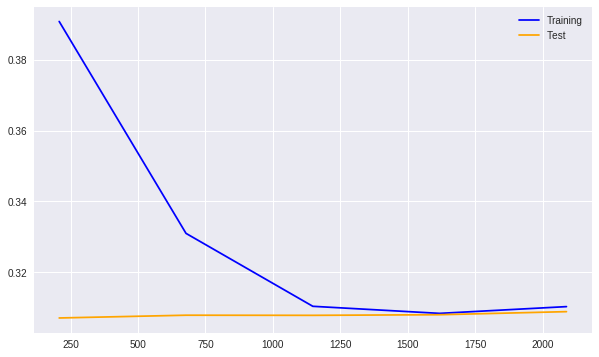

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sample_size, train_score.mean(axis=1), color='Blue', label='Training')
ax.plot(sample_size, test_score.mean(axis=1), color='Orange', label='Test')
plt.legend()

## Conclusion

In [ ]:
test_accuracy = test_score[-1][-1] * 100
print(f"The prediction is {test_accuracy:.2f}% accurate!")

The prediction is 31.61% accurate!


In [ ]:
# Let me try keras
import keras
from keras.models import Model, Sequential
from keras.layers import *
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [ ]:
learning_rate = 0.001 
training_epochs = 2
batch_size = 100

# Network Parameters
n_input = 8 # MNIST data input (img shape: 28*28 flattened to be 784)
n_hidden_1 = 384 # 1st layer number of neurons
n_hidden_2 = 100 # 2nd layer number of neurons
n_classes = 1  # MNIST classes for prediction(digits 0-9 )

In [ ]:
model = Sequential()
model.add(Dense(n_hidden_1,  input_shape=(n_input,), name = "Dense_1"))
model.add(Activation('relu', name = "Relu1"))
model.add(Dense(n_hidden_2, name = "Dense_2"))
model.add(Activation('relu', name = "Relu2"))
model.add(Dense(n_classes, name = "Output"))
model.add(Activation('softmax', name = "Softmax_output"))

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 384)               3456      
_________________________________________________________________
Relu1 (Activation)           (None, 384)               0         
_________________________________________________________________
Dense_2 (Dense)              (None, 100)               38500     
_________________________________________________________________
Relu2 (Activation)           (None, 100)               0         
_________________________________________________________________
Output (Dense)               (None, 1)                 101       
_________________________________________________________________
Softmax_output (Activation)  (None, 1)                 0         
Total params: 42,057
Trainable params: 42,057
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = SGD(lr=learning_rate)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= opt,
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_test, y_test))
#X_train, X_test, y_train, y_test  = train_test_split(X,y)

Train on 3132 samples, validate on 1045 samples
Epoch 1/10
3132/3132 [==============================] - 2s 745us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/10
3132/3132 [==============================] - 0s 39us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/10
3132/3132 [==============================] - 0s 38us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/10
3132/3132 [==============================] - 0s 43us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/10
3132/3132 [==============================] - 0s 39us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/10
3132/3132 [==============================] - 0s 40us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/10
3132/3132 [==============================] - 0s 41us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: nan
Test accuracy: 0.0
